Analisis Stroke Predict Dataset dengan EDA, KNN dan SVM

Memilih dataset dari Kaggle adalah langkah awal dalam analisis data. Dataset yang dipilih harus relevan, tidak terlalu besar, dan memiliki kualitas data yang memadai.

Dataset yang dipilih yaitu "Healthcare Dataset Stroke Prediction" by Poulami Bakshi
https://www.kaggle.com/code/poulamibakshi/healthcare-dataset-stroke-prediction?scriptVersionId=57462578&cellId=1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Membaca dataset
data = pd.read_csv(r'C:\Users\fadhi\Downloads\healthcare-dataset-stroke-data.csv')

In [4]:
# Mengecek nilai yg kosong
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# Menghapus data duplikat
data.duplicated().sum()

np.int64(0)

In [6]:
# Pembersihan data: mengisi nilai kosong pada kolom 'bmi' dengan median
data['bmi'].fillna(data['bmi'].median(), inplace=True)

C:\Users\fadhi\AppData\Local\Temp\ipykernel_9976\1390121244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


In [7]:
# Mengecek nilai kosong
print("Jumlah nilai kosong per kolom:")
print(data.isnull().sum())

Jumlah nilai kosong per kolom:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


Visualisasi Distribusi Variabel

Visualisasi distribusi variabel adalah cara untuk memahami bagaimana data tersebar atau didistribusikan dalam suatu kolom dataset Dengan menggunakan visualisasi, kita dapat dengan cepat mengidentifikasi pola, seperti distribusi normal, skewness (kemiringan), keberadaan outliers, dan proporsi kategori.

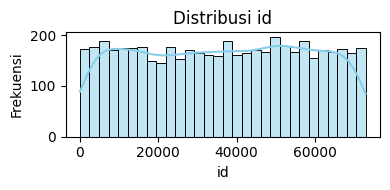

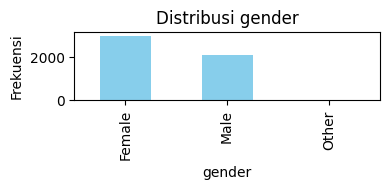

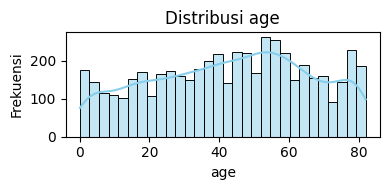

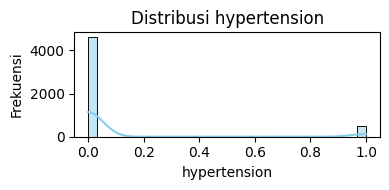

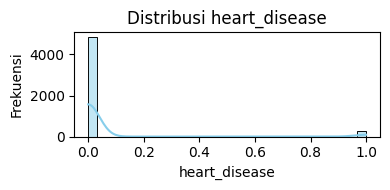

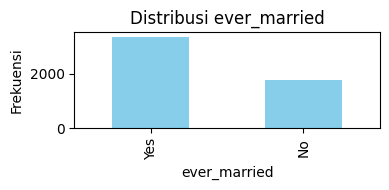

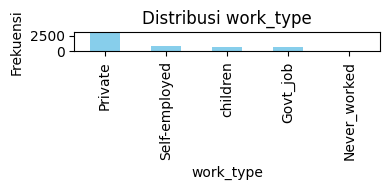

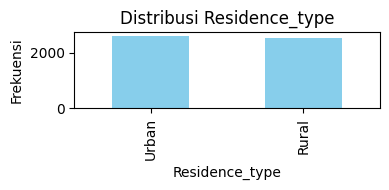

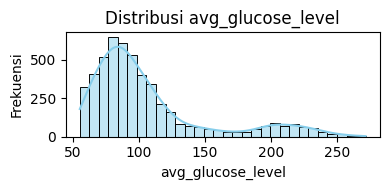

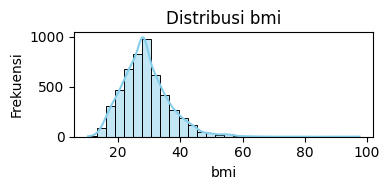

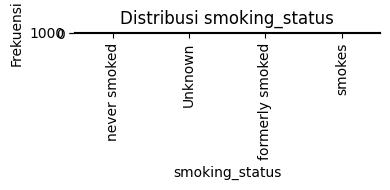

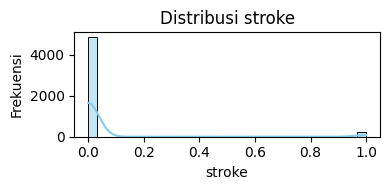

In [8]:
# Visualisasi distribusi untuk semua variabel
for kolom in data.columns:
    plt.figure(figsize=(4, 2))
    if data[kolom].dtype in ['int64', 'float64']:
        sns.histplot(data[kolom], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribusi {kolom}')
    else:
        data[kolom].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribusi {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

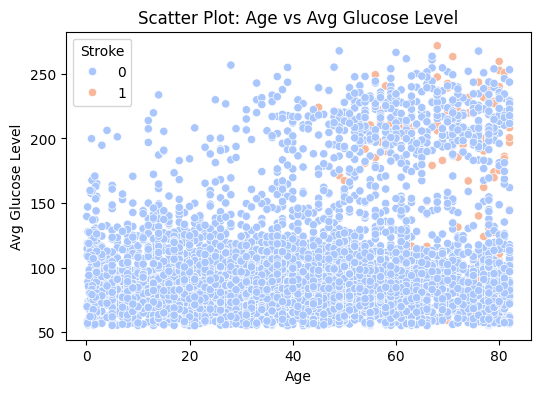

In [9]:
# Scatter plot antara 'age' dan 'avg_glucose_level'
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['age'], y=data['avg_glucose_level'], hue=data['stroke'], palette='coolwarm')
plt.title('Scatter Plot: Age vs Avg Glucose Level')
plt.xlabel('Age')
plt.ylabel('Avg Glucose Level')
plt.legend(title='Stroke', loc='upper left')
plt.show()

Sebuah scatter plot yang menggambarkan hubungan antara dua variabel: umur (age) dan rata-rata kadar glukosa darah (avg_glucose_level). Visualisasi ini menggunakan Seaborn untuk menampilkan titik-titik yang mewakili data pada sumbu X untuk umur dan sumbu Y untuk kadar glukosa darah. 

4 Warna titik-titik pada plot ini ditentukan oleh status stroke, di mana hue=data['stroke'] digunakan untuk memvisualisasikan apakah seseorang mengalami stroke atau tidak. Warna titik akan berubah sesuai dengan status stroke (biasanya dua kategori: strok atau tidak strok), dengan palet warna 'coolwarm' yang memberikan kontras yang jelas antara dua kategori tersebut.

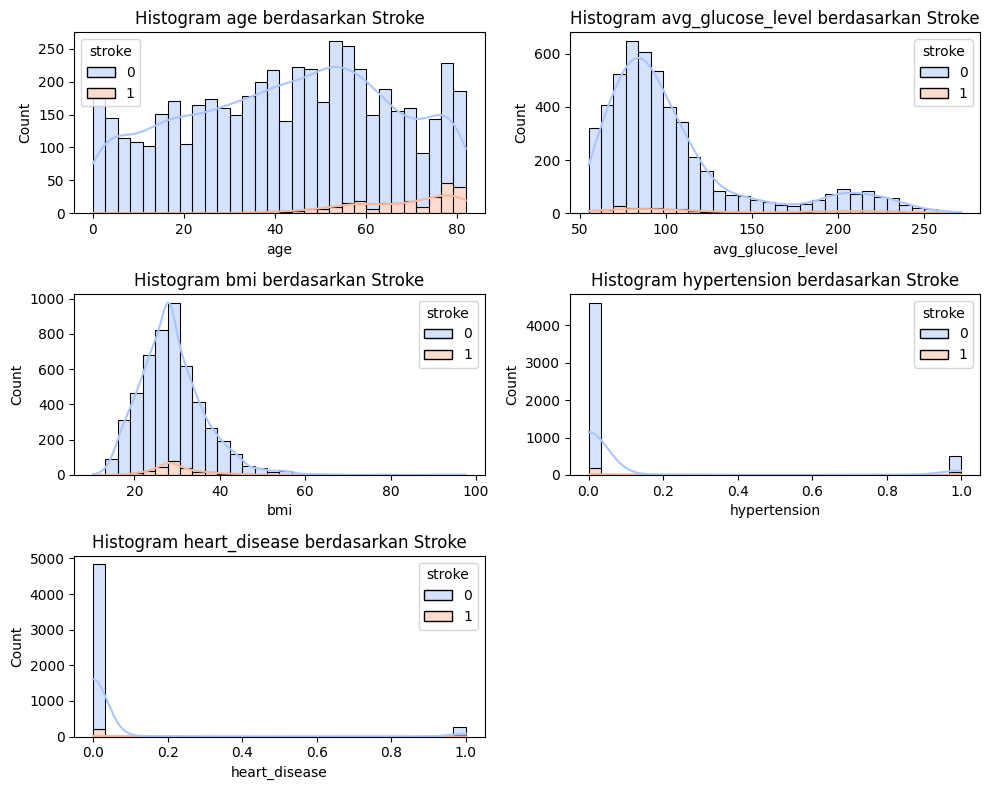

In [11]:
# Histogram distribusi variabel numerik untuk setiap kategori stroke
kolom_numerik = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']
plt.figure(figsize=(10, 8))
for i, kolom in enumerate(kolom_numerik, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=data, x=kolom, hue='stroke', kde=True, bins=30, palette='coolwarm', multiple='stack')
    plt.title(f'Histogram {kolom} berdasarkan Stroke')
plt.tight_layout()
plt.show()

Kode yang diberikan menghasilkan histogram untuk setiap variabel numerik dalam daftar kolom_numerik, yang mencakup age, avg_glucose_level, bmi, hypertension dan heart_disease. Histogram ini digunakan untuk menggambarkan distribusi nilai dari masing-masing variabel berdasarkan status stroke, dengan dua kategori: orang yang mengalami stroke dan yang tidak.

Mencari Korelasi antara variable

In [12]:
# Menghitung matriks korelasi untuk variabel age, avg glucose level, bmi, hypertension, heart disease dan stroke
matriks_korelasi = data[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']].corr()
print(matriks_korelasi)

                        age  avg_glucose_level       bmi  hypertension  \
age                1.000000           0.238171  0.324296      0.276398   
avg_glucose_level  0.238171           1.000000  0.166876      0.174474   
bmi                0.324296           0.166876  1.000000      0.158293   
hypertension       0.276398           0.174474  0.158293      1.000000   
heart_disease      0.263796           0.161857  0.036916      0.108306   
stroke             0.245257           0.131945  0.036110      0.127904   

                   heart_disease    stroke  
age                     0.263796  0.245257  
avg_glucose_level       0.161857  0.131945  
bmi                     0.036916  0.036110  
hypertension            0.108306  0.127904  
heart_disease           1.000000  0.134914  
stroke                  0.134914  1.000000  


Matriks korelasi ini menunjukkan sejauh mana hubungan antar variabel-variabel tersebut, dengan nilai yang dihasilkan berkisar antara -1 hingga 1. 
 
Pada kode ini, variabel age, avg_glucose_level, bmi, hypertension, heart_disease dan stroke. Hasilnya adalah sebuah matriks, di mana setiap elemen dalam matriks tersebut menunjukkan korelasi antara dua variabel. Korelasi antara dua variabel diukur dengan koefisien korelasi Pearson, yang mengukur kekuatan dan arah hubungan linier antar variabel. Nilai 1 menunjukkan korelasi positif yang sempurna (ketika satu variabel meningkat, variabel lainnya juga meningkat dengan proporsi yang sama), sedangkan -1 menunjukkan korelasi  negatif yang sempurna (ketika satu variabel meningkat, variabel lainnya menurun). Nilai 0 berarti tidak ada korelasi linier antara kedua variabel tersebut.

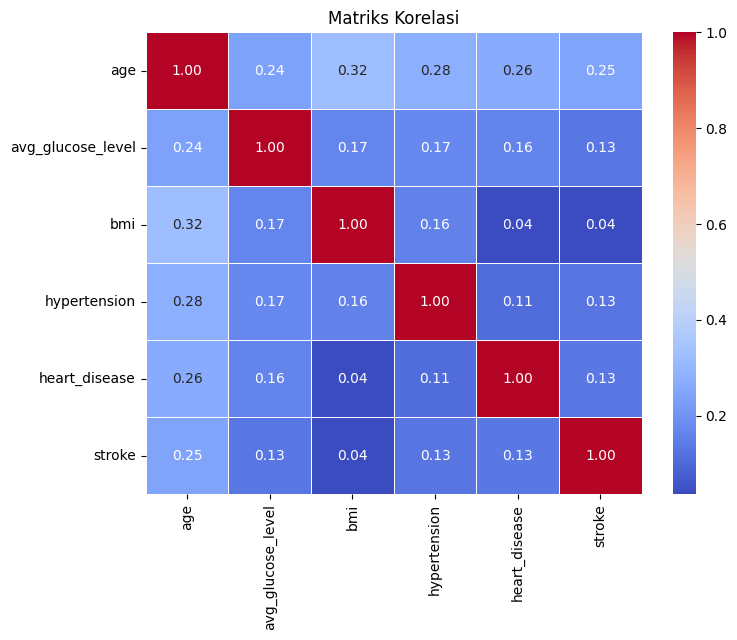

In [13]:
# Visualisasi matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

Korelasi yang Paling Kuat :
- Age vs. BMI (0.32) Ada hubungan positif yang cukup berarti antara usia dan BMI. Ini bisa berarti bahwa semakin tua seseorang, semakin tinggi kemungkinan BMI-nya meningkat.  
- Age vs. Hypertension (0.28) Semakin tua seseorang, semakin besar kemungkinan memiliki hipertensi.  
- Age vs. Heart Disease (0.26) Usia juga berhubungan dengan risiko penyakit jantung, meskipun korelasinya tidak terlalu kuat.  
- Age vs. Stroke (0.25) Semakin tua seseorang, semakin besar kemungkinan mengalami stroke.  

Korelasi Sedang :
- Avg Glucose Level vs. Age (0.24) Semakin tua seseorang, rata-rata kadar glukosa dalam darahnya cenderung meningkat.  
- Avg Glucose Level vs. BMI (0.17) Ada sedikit hubungan antara kadar glukosa dan BMI, tapi tidak terlalu kuat.  

Korelasi Lemah atau Hampir Tidak Ada :
- BMI vs. Stroke (0.04) BMI tampaknya tidak terlalu berpengaruh terhadap risiko stroke.  
- Heart Disease vs. Stroke (0.13) Penyakit jantung memiliki hubungan yang sangat lemah dengan stroke dalam dataset ini.  
- Hypertension vs. Stroke (0.13) Hipertensi juga memiliki hubungan yang lemah terhadap stroke.  

Kesimpulan
- Usia adalah faktor yang cukup berpengaruh terhadap hipertensi, penyakit jantung, dan stroke.  
- Kadar glukosa darah memiliki sedikit hubungan dengan usia dan BMI, tetapi tidak terlalu signifikan terhadap penyakit tertentu.  
- Hubungan antara BMI dan stroke tampaknya lemah, yang berarti BMI mungkin bukan faktor utama penyebab stroke dalam dataset ini.  